In [1]:
import os
import pickle
import itertools
from collections import defaultdict

import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sgp.GraphUtil import sparse_to_networkx

%matplotlib inline

Properties:
* The number of nodes increases as tau decreases (minimum > 0).
* The number of nodes increases as alpha increases
* Expected number of dense node is : -alpha / sigma * tau ^ sigma

Basic parameter config (sparse alpha, sigma, tau + dense alpha, sigma tau):
* 100, 0.5, 1, 100, -1, 0.1 (generate the largest graph among basic configurations)
* 100, 0.5, 1, 100, -1, 1

Additional parameter configurations
* 100, 0, 1 + 100, -1, 1
* 100, 0.5, 0.1 + 100, -1, 0.1

In [2]:
mdest = '../result/random_network/mixture/'
sdest = '../result/random_network/sparse/'

m_f = '%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.pkl'
s_f = '%d_%.2f_%.2f_%.2f.pkl'

In [3]:
colors = cm.rainbow(np.linspace(0, 1, 7))
np.random.shuffle(colors)
colors = itertools.cycle(colors)

In [4]:
def degree_dist_list(graph, ddist):
    _ddict = nx.degree(graph)
    _ddist = defaultdict(int)
    for k, v in _ddict.items():
        _ddist[v] += 1
    for k, v in _ddist.items():
        ddist[k].append(v)
    del _ddict, _ddist
    return ddist

def avg_degree_dist(path_list):
    """ Compute average degree distribution over repeated simulations
    """
    ddist = defaultdict(list)
    for path in path_list:
        sample = pickle.load(open(path, 'rb'))
        G = sparse_to_networkx(sample[0])
        degree_dist_list(G, ddist)
        del G, sample
    avg_dist = dict()
    for k, v in ddist.items():
        avg_dist[k] = sum(ddist[k])/len(ddist[k])
    return avg_dist

def scatter(_ddist, path, color=None):
    """ print scatter plot of given degree distribution dictionary
    """
    plt.scatter(list(_ddist.keys()), list(_ddist.values()), label=os.path.basename(path), color=color)

def degree_dist(graph):
    """ Compute digree distribution of given graph
    """
    _ddict = nx.degree(graph)
    _ddist = defaultdict(int)
    for k, v in _ddict.items():
        _ddist[v] += 1
    return _ddist

## Comparision bewteen sparse and mixed graph

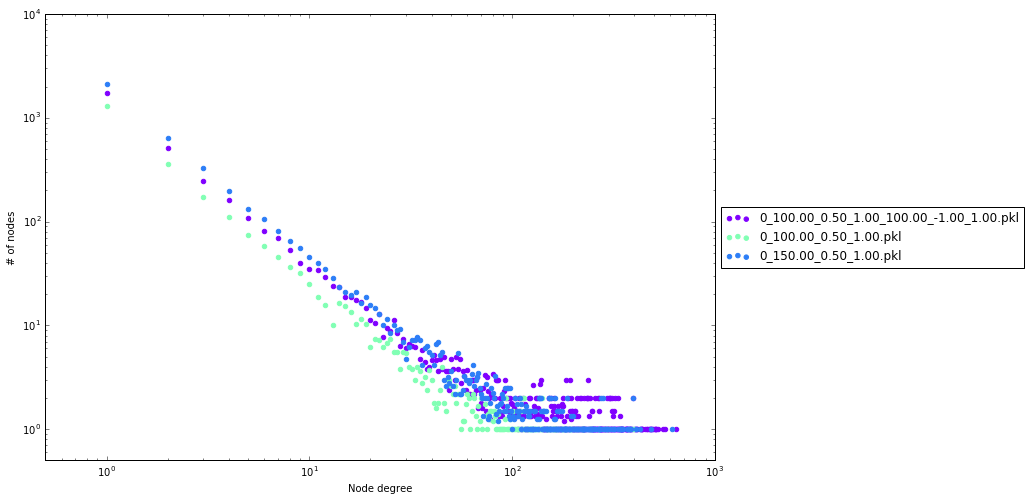

In [5]:
alpha = 100
sigma = 0.5
tau = 1
d_alpha = 100
d_sigma = -1
d_tau = 1
d_taus = [1]
n_samples = 5

plt.figure(figsize=(12, 8))
path_list = list()
for i in range(n_samples):
    path_list.append(os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau)))
ddist = avg_degree_dist(path_list)
scatter(ddist, path_list[0], next(colors))
    
alphas = [100, 150]
for alpha in alphas:
    path_list = list()
    for i in range(n_samples):
        path_list.append(os.path.join(sdest, s_f % (i, alpha, sigma, tau)))
    ddist = avg_degree_dist(path_list)
    scatter(ddist, path_list[0], next(colors))

ax = plt.subplot()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('# of nodes')
plt.xlabel('Node degree')
plt.ylim(0.5); plt.xlim(0.5); plt.show()

### Varying sigma in the sparse part of the mixed graph

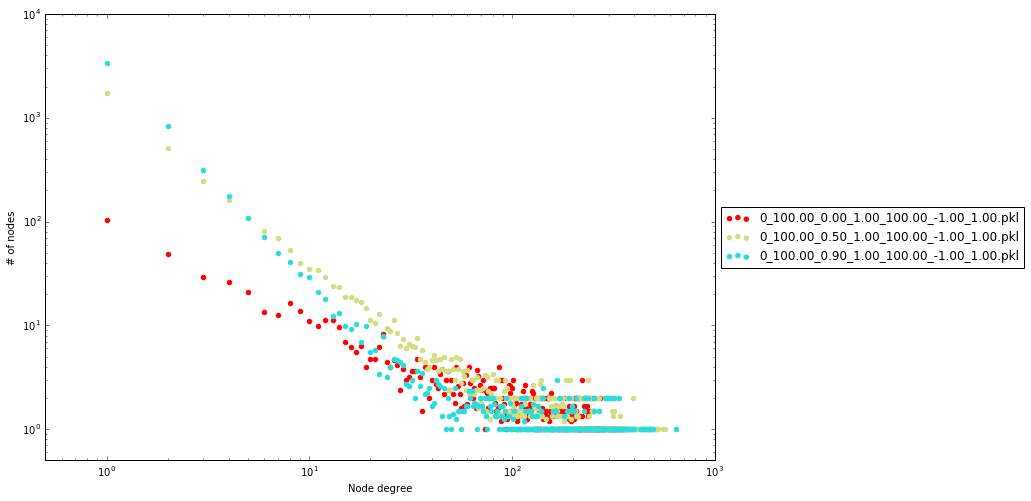

In [6]:
sigmas = [0, 0.5, 0.9]
alpha = 100
tau = 1
d_alpha = 100
d_sigma = -1
d_tau = 1

plt.figure(figsize=(12, 8))
for sigma in sigmas:
    path_list = list()
    for i in range(n_samples):
        path_list.append(os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau)))
    ddist = avg_degree_dist(path_list)
    scatter(ddist, path_list[0], next(colors))
    
ax = plt.subplot()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('# of nodes')
plt.xlabel('Node degree')
plt.ylim(0.5); plt.xlim(0.5); plt.show()

### Varying tau in the sparse part of the mixed graph

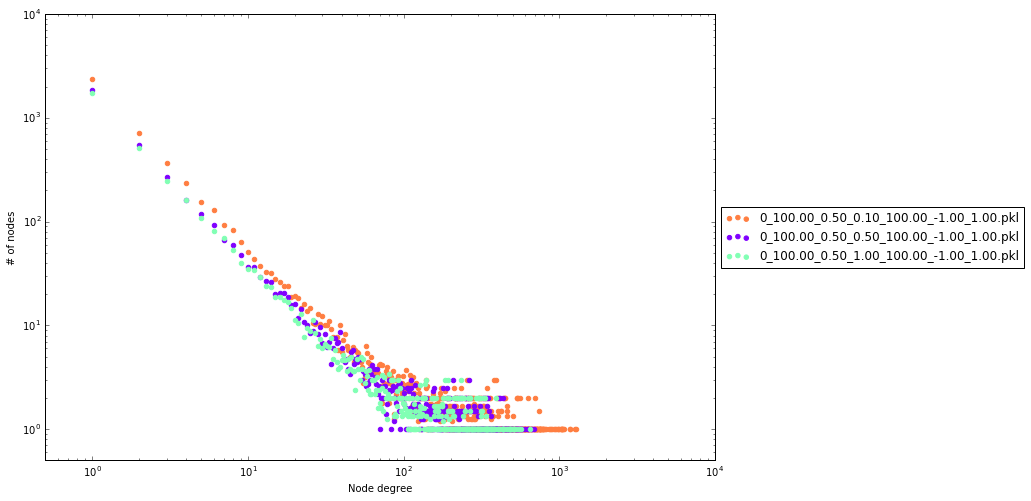

In [7]:
alpha = 100
sigma = 0.5
taus = [0.1, 0.5, 1]
d_alpha = 100
d_sigma = -1
d_tau = 1

plt.figure(figsize=(12, 8))
for tau in taus:
    path_list = list()
    for i in range(n_samples):
        path_list.append(os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau)))
    ddist = avg_degree_dist(path_list)
    scatter(ddist, path_list[0], next(colors))

ax = plt.subplot()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('# of nodes')
plt.xlabel('Node degree')
plt.ylim(0.5); plt.xlim(0.5); plt.show()

### Varying sigma in the dense part of the mixed graph

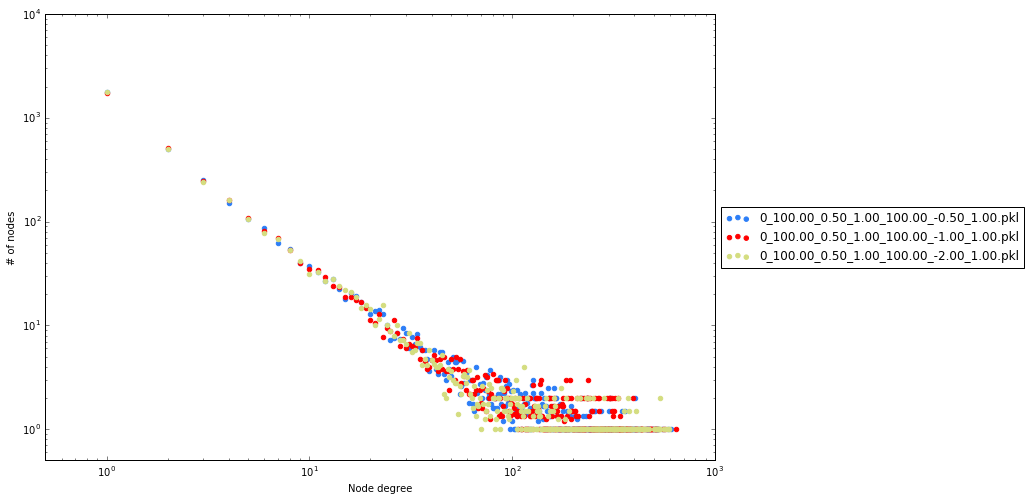

In [8]:
alpha = 100
sigma = 0.5
tau = 1
d_alpha = 100
d_tau = 1
sigmas = [-0.5, -1, -2]

plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 8))
for d_sigma in sigmas:
    path_list = list()
    for i in range(n_samples):
        path_list.append(os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau)))
    ddist = avg_degree_dist(path_list)
    scatter(ddist, path_list[0], next(colors))
    
ax = plt.subplot()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('# of nodes')
plt.xlabel('Node degree')
plt.ylim(0.5); plt.xlim(0.5); plt.show()

### Varying tau in the dense part of the mixed graph

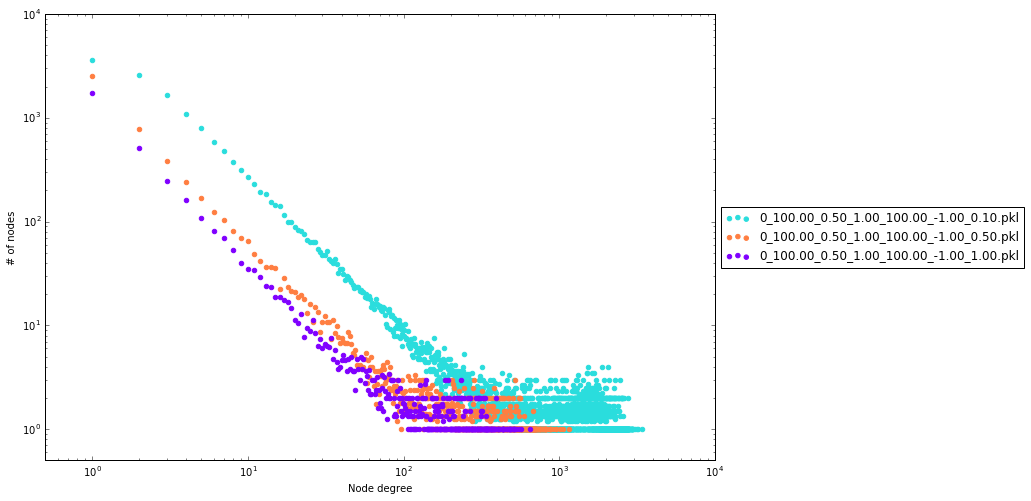

In [9]:
alpha = 100
sigma = 0.5
tau = 1
d_alpha = 100
d_sigma = -1
taus = [0.1, 0.5, 1]

plt.figure(figsize=(12, 8))
for d_tau in taus:
    path_list = list()
    for i in range(n_samples):
        path_list.append(os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau)))
    ddist = avg_degree_dist(path_list)
    scatter(ddist, path_list[0], next(colors))
    
# for d_tau in taus:
#     mfile = os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau))
#     if os.path.exists(mfile):
#         sample = pickle.load(open(mfile, 'rb'))
#         G = sparse_to_networkx(sample[0])
#         ddist = degree_dist(G)
#         scatter(ddist, mfile, next(colors))

ax = plt.subplot()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('# of nodes')
plt.xlabel('Node degree')
plt.ylim(0.5); plt.xlim(0.5); plt.show()